In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
from math import log2


ROUNDS_COUNT = 255
WINNING_TABLE = [[3, 0], [5, 1]]

SIMULATIONS_PER_GAME = 100
MAX_SCORE = max(max(WINNING_TABLE, key= lambda x: max(x))) * ROUNDS_COUNT



In [11]:
def probability_of_1(probability):
    # 1 c вероятностью probability
    return 1 if random.random() < probability else 0

#history1 - история игрока
#history2 - история оппонента

def Alex(history1: list, history2: list, *args) -> int:
    Alex.type = "determined"
    return (1, None)

def Bob(history1: list, history2: list, *args) -> int:
    Bob.type = "determined"
    return (0, None)

def Clara(history1: list, history2: list, *args) -> int:
    Clara.type = "determined"
    if len(history1) == 0:
        return (0, None)
    else:
        return (history2[-1], None)
    
def Denis(history1: list, history2: list, *args) -> int:
    Denis.type = "determined"
    if len(history1) == 0:
        return (0, None)
    else:
        return (1 - history2[-1], None)

def Emma(history1: list, history2: list, *args) -> int:
    Emma.type = "determined"
    if len(history1) == 0: 
        return (0, None)
    elif (len(history1) + 1) % 20 == 0:
        return (1, None)
    else: return (0, None)

def Frida(history1: list, history2: list, *args) -> int:
    Frida.type = "determined"
    if len(history1) == 0:
        return (0, None)
    elif 1 in history2: 
        return (1, None)
    else: return (0, None)

def George(history1: list, history2: list, *args) -> int:
    George.type = "determined"
    if len(history2) == 0: 
        return (0, None)
    elif len(history2) == 1:
        return (((1 + history2[-1])) % 2, None)
    return ((((len(history1) % 5) + history2[-1]) * (len(history1) % 5 + history2[-2])) % 2, None)

#-------------------------------------------------

def Hank(history1: list, history2: list, *args) -> int:
    Hank.type = "stochastic"
    return (probability_of_1(0.5), None)

def Ivan(history1: list, history2: list, *args) -> int:
    Ivan.type = "stochastic"
    return (probability_of_1(0.1), None)

def Jack(history1: list, history2: list, *args) -> int:
    Jack.type = "stochastic"
    if len(history1) == 0:
        return (0, None)
    elif history2[-1] == 0:
        return (0, None)
    else:
        return (probability_of_1(0.75), None)

def Kevin(history1: list, history2: list, *args) -> int:
    Kevin.type = "stochastic"
    if len(history1) == 0:
        return (0, None)
    elif probability_of_1(0.75):
        return (history2[-1], None)
    else:
        return (1 - history2[-1], None)

def Lucas(history1: list, history2: list, *args) -> int:
    Lucas.type = "stochastic"
    distance = args[0]
    if len(history1) == 0:
        distance = random.randrange(1, 50)
    if (len(history1) + 1) % distance == 0:
        return (1, distance)
    else:
        return (0, distance)
    
def Max(history1: list, history2: list, *args) -> int:
    Max.type = "stochastic"
    distance = args[0] if len(history1) == 0 else args[0][0]
    count = args[0][1] if len(args) > 1 else distance
    if len(history1) == 0 or count == -1:
        distance = random.randrange(1, 20)
        count = distance
    count -= 1
    if count != -1:
        return (0 if len(history1) == 0 else history1[-1], (distance, count))
    else:
        return (1 - history1[-1], (distance, count))
    
def Natan(history1: list, history2: list, *args) -> int:
    Natan.type = "stochastic"
    return (probability_of_1((len(history1) % 10 + 1) // 20), None)


In [12]:
def game(strategy1, strategy2):    
    history1 = []
    history2 = []
    gamer1_score = 0
    gamer2_score = 0

    max_series1 = 0
    max_series2 = 0
    series1 = 0
    series2 = 0

    args1, args2 = None, None
    for k in range(ROUNDS_COUNT):
        last_in_history1, args1 = strategy1(history1, history2, args1)
        last_in_history2, args2 = strategy2(history2, history1, args2)
        history1.append(last_in_history1)
        history2.append(last_in_history2)

        i, j = history1[-1], history2[-1] 
        gamer1_score += WINNING_TABLE[i][j]
        gamer2_score += WINNING_TABLE[j][i]

        if WINNING_TABLE[i][j] == WINNING_TABLE[1][0]:
            series1 += 1
            series2 = 0
            max_series1 = max(max_series1, series1)
        elif WINNING_TABLE[j][i] == WINNING_TABLE[1][0]:
            series1 = 0
            series2 += 1
            max_series2 = max(max_series2, series2)
        else: 
            series1 = 0
            series2 = 0

    return ((gamer1_score, gamer2_score), (max_series1, max_series2))




In [13]:
determined = [Alex, Bob, Clara, Denis, Emma, Frida, George]
stochastic = [Hank, Ivan, Jack, Kevin, Lucas, Max, Natan]
strategies = determined + stochastic
def meeting(strategy1, strategy2):
    mean1, mean2 = None, None
    median1, median2 = None, None
    moda1, moda2 = None, None
    dispersion1, dispersion2 = None, None
    games = []

    def get_index(score, count):
        step = MAX_SCORE / count
        index = int(score / step)
        return min(max(0, index), count - 1)
    
    def get_mean_in_arr(arr):
        max_len = 0
        max_index = 0
        for i in range(len(arr)):
            if len(arr[i]) > max_len:
                max_len = len(arr[i])
                max_index = i
        
        if max_len == 0:
            return 0
        
        return sum(arr[max_index]) / max_len


    if strategy1 in determined and strategy2 in determined:
        simulations = 1
    else: simulations = SIMULATIONS_PER_GAME

    count = int(log2(1 + simulations) )
    arr1 = [[] for i in range(count)]
    arr2 = [[] for i in range(count)]

    for i in range(simulations):
        scores, series = game(strategy1, strategy2)
        games.append((scores, series))
        

        index = get_index(scores[0], count)
        arr1[index].append(scores[0])
        index = get_index(scores[1], count)
        arr2[index].append(scores[1])


    games = sorted(games, key= lambda x: x[0][0])
    
    mean1 = sum(i[0][0] for i in games) / simulations
    mean2 = sum(i[0][1] for i in games) / simulations

    median1 = (games[(simulations- 1) // 2][0][0] + games[simulations // 2][0][0]) / 2 if simulations % 2 == 0 else games[(simulations- 1) // 2][0][0]
    median2 = (games[(simulations- 1) // 2][0][1] + games[simulations // 2][0][1]) / 2 if simulations % 2 == 0 else games[(simulations- 1) // 2][0][1]

    moda1 = get_mean_in_arr(arr1)
    moda2 = get_mean_in_arr(arr2)

    dispersion1 = sum((x[0][0] - mean1) ** 2 for x in games) / simulations 
    dispersion2 = sum((x[0][1] - mean2) ** 2 for x in games) / simulations 

    return [(scores[0], scores[1]), (series[0], series[1]), (mean1, mean2), (median1, median2), (moda1, moda2), (dispersion1, dispersion2)]



    
        
    

In [14]:
def create_results_matrix(strategies):
    n = len(strategies)
    scores_matrix = np.zeros((n, n, 2))
    series_matrix = np.zeros((n, n, 2))
    means_matrix = np.zeros((n, n, 2))
    medians_matrix = np.zeros((n, n, 2))
    modas_matrix = np.zeros((n, n, 2))
    dispersions_matrix = np.zeros((n, n, 2))

    strategy_names = [s.__name__ for s in strategies]
    
    for i, strat1 in enumerate(strategies):
        for j, strat2 in enumerate(strategies):                
            scores, series, means, medians, modas, dispersions = meeting(strat1, strat2)

            scores_matrix[i, j, 0] = scores[0] 
            scores_matrix[i, j, 1] = scores[1] 

            series_matrix[i, j, 0] = series[0]
            series_matrix[i, j, 1] = series[1]

            means_matrix[i, j, 0] = means[0]
            means_matrix[i, j, 1] = means[1]

            medians_matrix[i, j, 0] = medians[0]
            medians_matrix[i, j, 1] = medians[1]

            modas_matrix[i, j, 0] = modas[0]
            modas_matrix[i, j, 1] = modas[1]

            dispersions_matrix[i, j, 0] = dispersions[0]
            dispersions_matrix[i, j, 1] = dispersions[1]

            
    return strategy_names, scores_matrix, series_matrix, means_matrix, medians_matrix, modas_matrix, dispersions_matrix


In [15]:
def create_plot(names, matrix, label):
    n = len(names)
    fig, ax2 = plt.subplots(1, 1, figsize=(20, 10))
    
    if "серия" in label.lower() or "серии" in label.lower():
        # Для серий максимальное значение
        total_values = np.maximum(matrix[:,:,0], matrix[:,:,1])
    else:
        # Для остальных сумму
        total_values = matrix[:,:,0] + matrix[:,:,1]
    
    im2 = ax2.imshow(total_values, cmap='Greens', aspect='equal')
    
    for i in range(n):
        for j in range(n):
            value_i = int(matrix[i, j, 0])
            value_j = int(matrix[i, j, 1])
            
            if value_i.is_integer() and value_j.is_integer():
                text_str = f'({int(value_i)},{int(value_j)})'
            
            text = ax2.text(j, i, text_str,
                          ha='center', va='center', fontsize=6,
                          fontweight='bold')
    
    ax2.set_xticks(np.arange(n))
    ax2.set_yticks(np.arange(n))
    ax2.set_xticklabels(names, rotation=45, ha='right')
    ax2.set_yticklabels(names)
    
    cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.8)
    cbar2.set_label(label)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

In [16]:
def create_combined_plot(strategy_names, score_matrix, series_matrix, means_matrix, medians_matrix, modas_matrix, dispersions_matrix):    
    n = len(strategy_names)

    fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))
    
    total_scores = score_matrix[:,:,0] + score_matrix[:,:,1]
    im1 = ax1.imshow(total_scores, cmap='Greens', aspect='equal')
    for i in range(n):
        for j in range(n):
            score_i = int(score_matrix[i, j, 0])
            score_j = int(score_matrix[i, j, 1])
            
            text = ax1.text(j, i, f'({score_i},{score_j})',
                          ha='center', va='center', fontsize=6,
                          fontweight='bold')
    ax1.set_xticks(np.arange(n))
    ax1.set_yticks(np.arange(n))
    ax1.set_xticklabels(strategy_names, rotation=45, ha='right')
    ax1.set_yticklabels(strategy_names)
    
    cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
    cbar1.set_label('Сумма очков в паре')

    create_plot(strategy_names, series_matrix, "Максимальная серия")
    create_plot(strategy_names, means_matrix, "Средние значения очков")
    create_plot(strategy_names, medians_matrix, "Медианные значения очков")
    create_plot(strategy_names, modas_matrix, "Модальные значения очков")
    create_plot(strategy_names, dispersions_matrix, "Дисперсии очков")

    

In [17]:
def create_summary_table(strategy_names, score_matrix, series_matrix, means_matrix, medians_matrix, modas_matrix, dispersions_matrix):
    print("СУММАРНЫЕ РЕЗУЛЬТАТЫ ПО СТРАТЕГИЯМ")
    print("-" * 45)
    
    total_scores = []
    for i, name in enumerate(strategy_names):
        total_score = np.sum(score_matrix[i, :, 0])
        avg_score = total_score / len(strategy_names)
        total_scores.append((name, total_score, avg_score))
    
    total_scores.sort(key=lambda x: x[2], reverse=True)
    
    print(f"{'Стратегия':<12} | {'Среднее за игру':<15} | Тип стратегии")
    print("-" * 45)
    for name, total, avg in total_scores:
        print(f"{name:<12} | {avg:<15.2f} | {"1" if name in strategy_names[0:7] else "2"}")

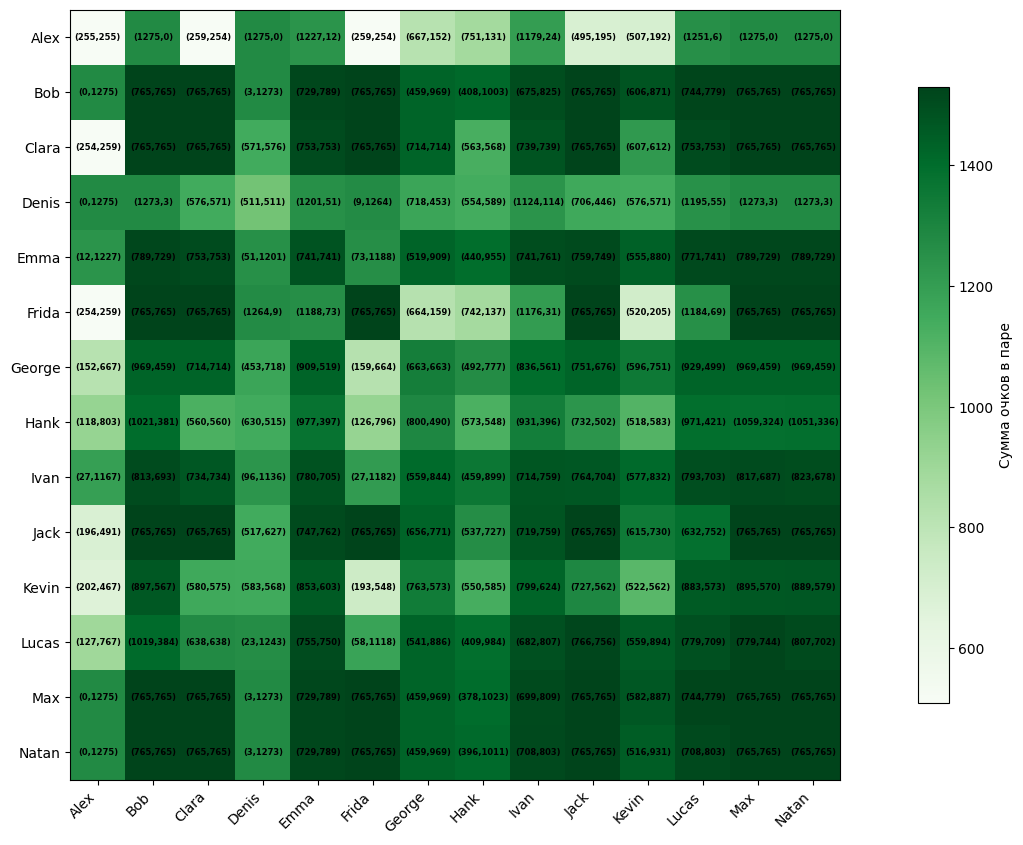

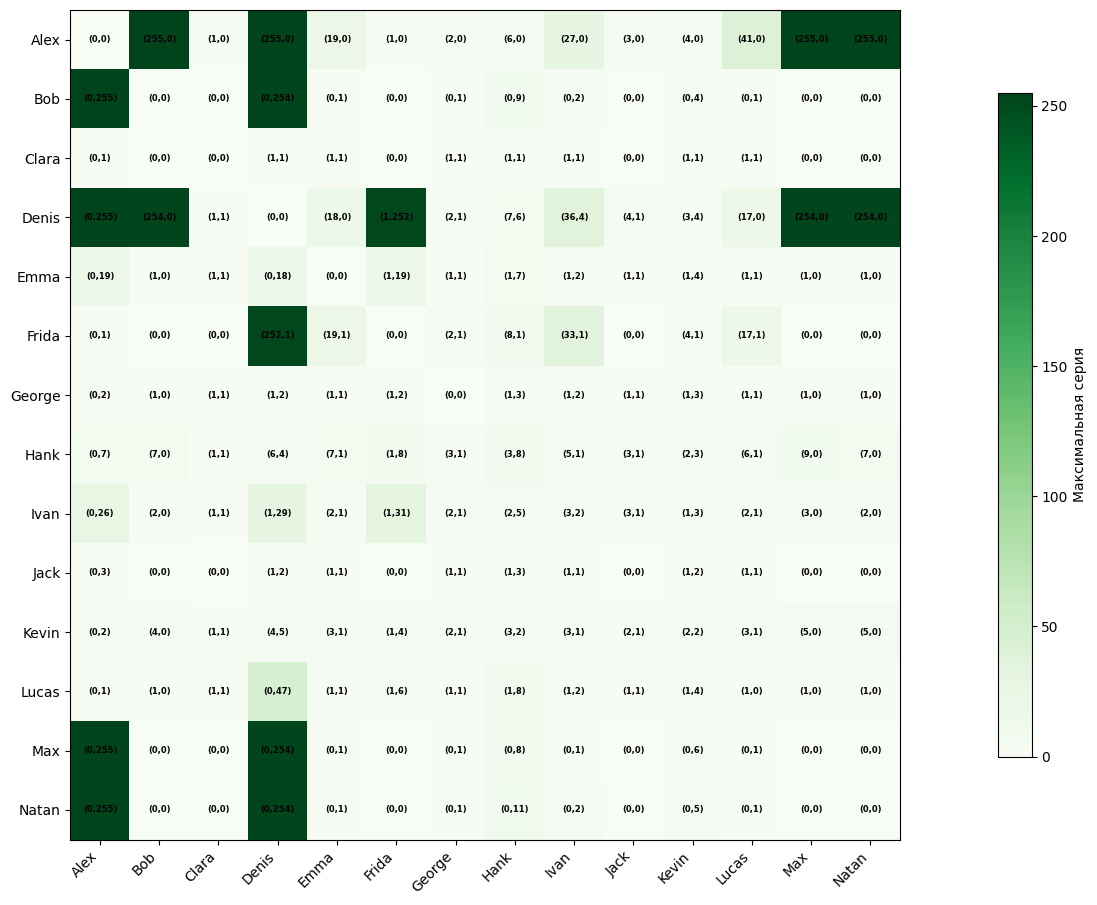

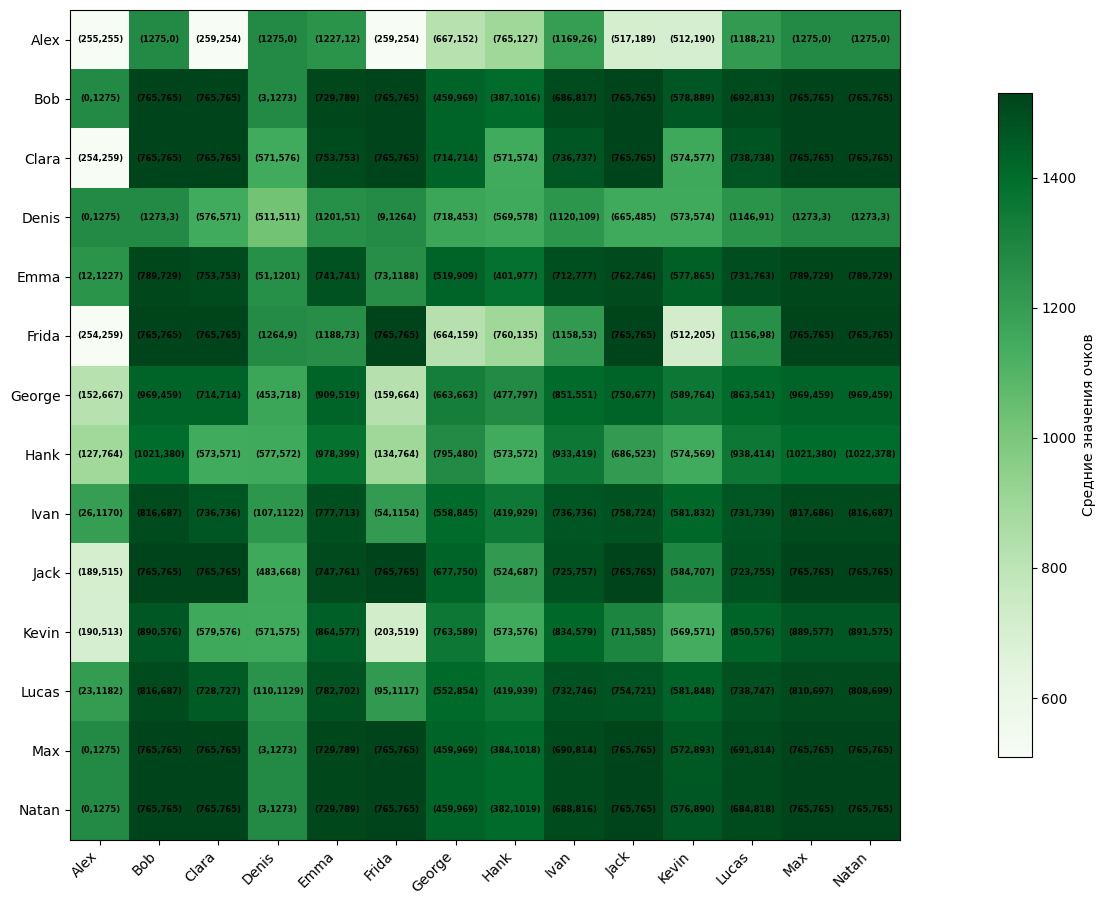

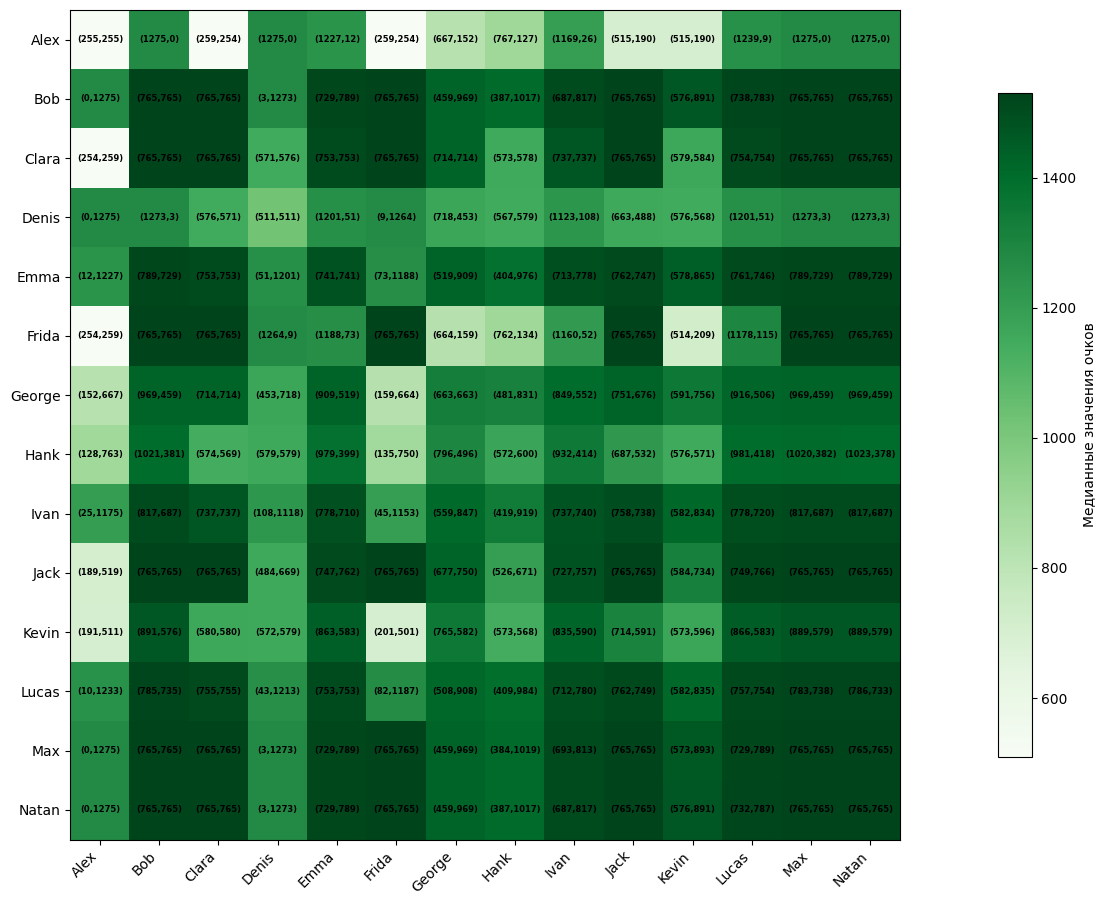

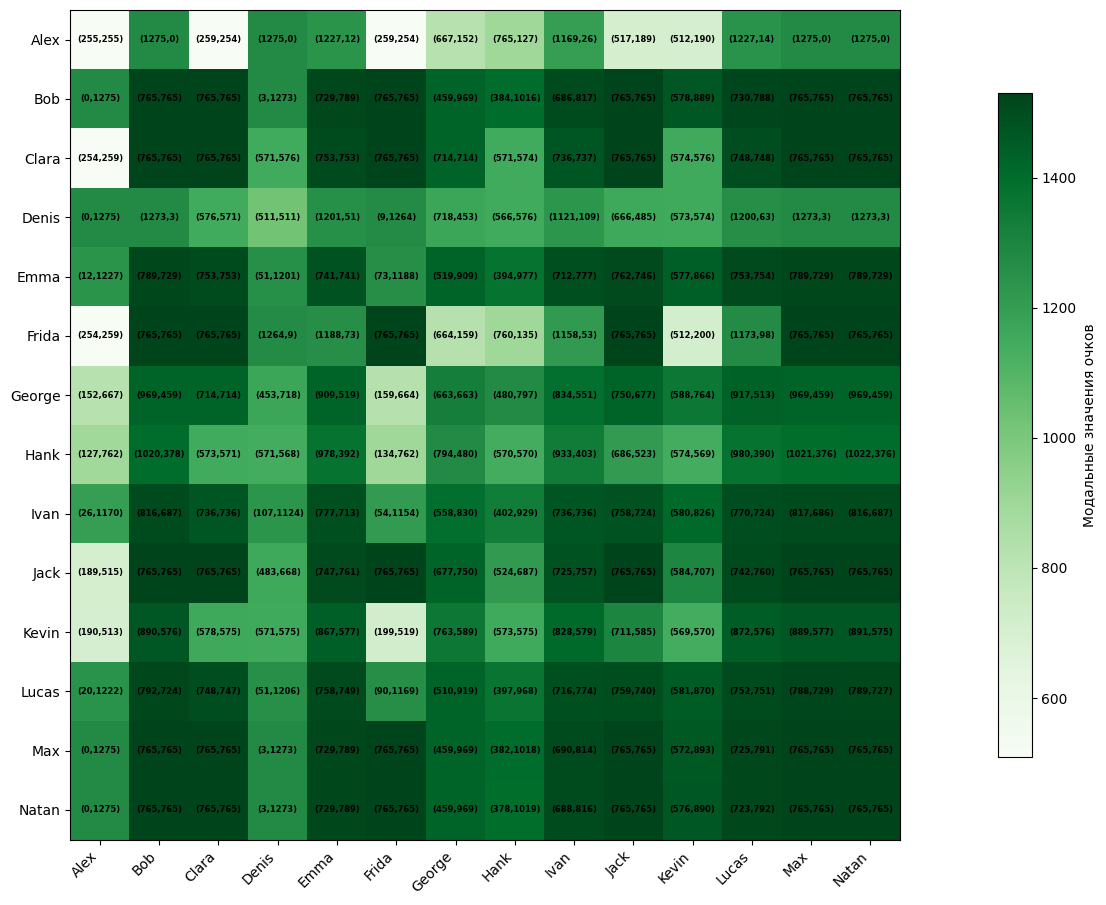

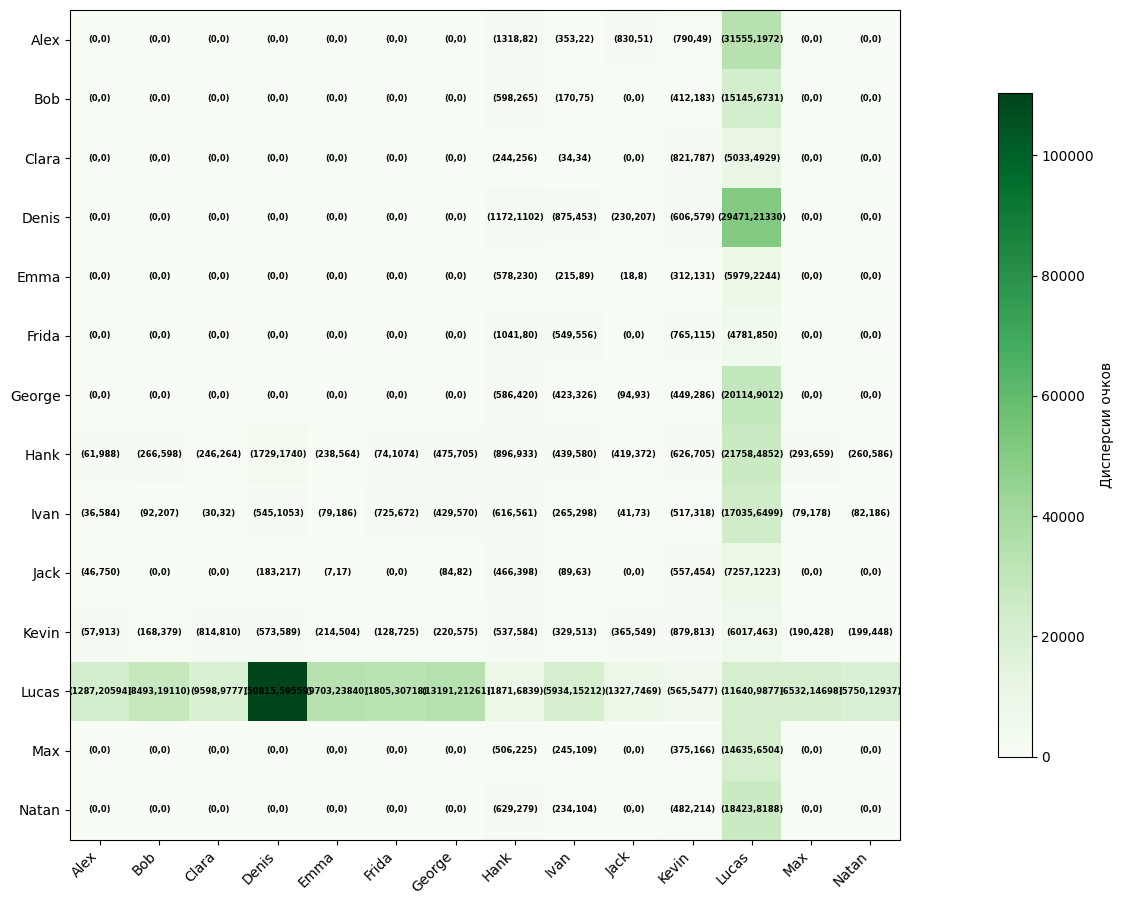

In [18]:
if __name__ == "__main__":
    determined = [Alex, Bob, Clara, Denis, Emma, Frida, George]
    stochastic = [Hank, Ivan, Jack, Kevin, Lucas, Max, Natan]
    strategies = determined + stochastic
    
    strategy_names, score_matrix, series_matrix, means_matrix, medians_matrix, modas_matrix, dispersions_matrix = create_results_matrix(strategies)
    
    create_combined_plot(strategy_names, score_matrix, series_matrix, means_matrix, medians_matrix, modas_matrix, dispersions_matrix)
    
    #create_summary_table(strategy_names, score_matrix, series_matrix, means_matrix, medians_matrix, modas_matrix, dispersions_matrix)
